In [33]:
import sqlite3
import pandas as pd
import plotly.express as px
import sys
import plotly.graph_objects as go

sys.path.append('../')
from functions_env import DB_PATH


conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()



In [34]:
# Years
df_ind = pd.read_sql_query("SELECT * FROM individuals_main_information", conn)

df_ind_year = df_ind[["individual_wikidata_id", "birthyear", "individual_name"]].drop_duplicates()
df_ind_year = df_ind_year[~df_ind_year['birthyear'].isna()]
df_ind_year["productive_year"] = df_ind_year["birthyear"] + 35
temporal_resolution = 50
df_ind_year["decade"] = df_ind_year["productive_year"].apply(lambda x: round(x / temporal_resolution) * temporal_resolution)
df_ind_year = df_ind_year[df_ind_year['decade']<=1850]


# Individuals Regions
df_ind_regions = pd.read_sql_query("SELECT * FROM individuals_regions", conn)
df_ind_regions = df_ind_regions[['individual_wikidata_id', 'region_name']].drop_duplicates()


In [35]:
df_occupations = pd.read_sql_query("SELECT * FROM individual_occupations", conn)
#df_occupations = df_occupations.groupby('individual_wikidata_id')['occupations_name'].count().reset_index()

In [36]:
"""

df_catalogs_id = pd.read_sql_query("SELECT * FROM individual_identifiers", conn)
df_catalogs_id = df_catalogs_id.groupby('individual_wikidata_id')['identifiers_wikidata_id'].count().reset_index()
df_catalogs_id = df_catalogs_id.sort_values('identifiers_wikidata_id', ascending=False)

total_len = len(df_catalogs_id)
df_catalogs_id = df_catalogs_id.head(int(0.1*total_len))
list_top_individuals = list(set(df_catalogs_id.individual_wikidata_id))

#df_catalogs_id = df_catalogs_id.head()


"""

'\n\ndf_catalogs_id = pd.read_sql_query("SELECT * FROM individual_identifiers", conn)\ndf_catalogs_id = df_catalogs_id.groupby(\'individual_wikidata_id\')[\'identifiers_wikidata_id\'].count().reset_index()\ndf_catalogs_id = df_catalogs_id.sort_values(\'identifiers_wikidata_id\', ascending=False)\n\ntotal_len = len(df_catalogs_id)\ndf_catalogs_id = df_catalogs_id.head(int(0.1*total_len))\nlist_top_individuals = list(set(df_catalogs_id.individual_wikidata_id))\n\n#df_catalogs_id = df_catalogs_id.head()\n\n\n'

<Axes: title={'center': 'Latin World'}, xlabel='decade'>

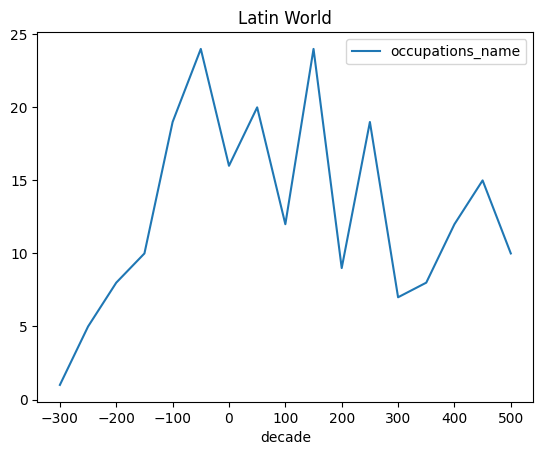

In [37]:
df_final_original = pd.merge(df_ind_year, df_occupations, on = 'individual_wikidata_id')
df_final_original = pd.merge(df_final_original, df_ind_regions, on = 'individual_wikidata_id')
df_final_original = df_final_original[['individual_wikidata_id', 'decade', 'occupations_name', 'region_name']].drop_duplicates()


region_name =  'Latin World'
min_date = -300
max_date = 500

df_final = df_final_original[df_final_original['region_name']==region_name]
df_final = df_final[df_final['decade']>=min_date]
df_fig = df_final[df_final['decade']<=max_date]

df_final = df_final.groupby(['decade', 'region_name']).sample(100, random_state=42, replace = True)
df_fig = df_final.groupby(['region_name','decade'])['occupations_name'].apply(lambda x : len(set(x))).reset_index()
df_fig.plot(x = 'decade', y = 'occupations_name', title = region_name)

<Axes: title={'center': 'Greek World'}, xlabel='decade'>

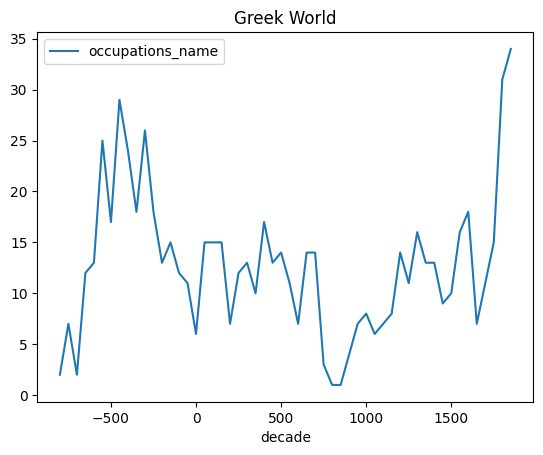

In [38]:
region_name =  'Greek World'
min_date = -800
max_date = 500

df_final = df_final_original[df_final_original['region_name']==region_name]
df_final = df_final[df_final['decade']>=min_date]
df_fig = df_final[df_final['decade']<=max_date]

df_final = df_final.groupby(['decade', 'region_name']).sample(100, random_state=42, replace = True)
df_fig = df_final.groupby(['region_name','decade'])['occupations_name'].apply(lambda x : len(set(x))).reset_index()
df_fig.plot(x = 'decade', y = 'occupations_name', title = region_name)

In [39]:
region_name =  'Chinese world'
min_date = -800
max_date = 1850

df_final = df_final_original[df_final_original['region_name']==region_name]
df_final = df_final[df_final['decade']>=min_date]
df_fig = df_final[df_final['decade']<=max_date]
df_final.decade.value_counts()
len(set(df_final.individual_wikidata_id))

2201

<Axes: title={'center': 'Chinese world'}, xlabel='decade'>

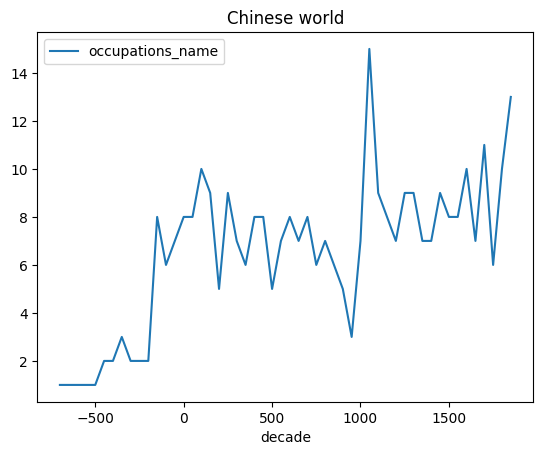

In [40]:

df_final = df_final.groupby(['decade', 'region_name']).sample(30, replace = True)

df_final = df_final[['decade', 'occupations_name']].drop_duplicates()
#df_final['count_unique_occupation'] = 1
df_fig = df_final.groupby(['decade'])['occupations_name'].count().reset_index()
df_fig.plot(x = 'decade', y = 'occupations_name', title = region_name)



In [41]:


#list(set(df_final[df_final['decade']==1500].occupations_name))

<Axes: title={'center': 'Japan'}, xlabel='decade'>

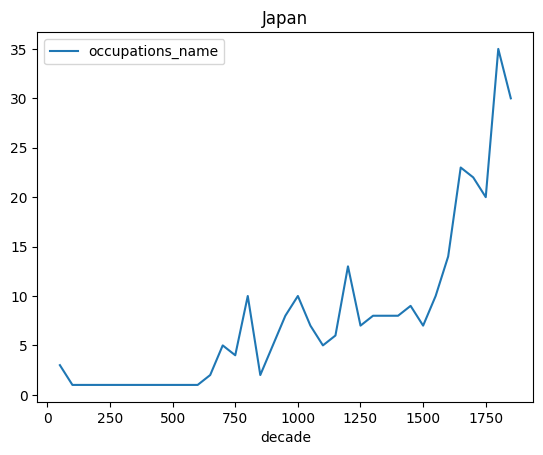

In [42]:
region_name =  'Japan'
min_date = -800
max_date = 1850

df_final = df_final_original[df_final_original['region_name']==region_name]
df_final = df_final[df_final['decade']>=min_date]
df_fig = df_final[df_final['decade']<=max_date]

df_final = df_final.groupby(['decade', 'region_name']).sample(100, random_state=42, replace = True)
df_fig = df_final.groupby(['region_name','decade'])['occupations_name'].apply(lambda x : len(set(x))).reset_index()
df_fig.plot(x = 'decade', y = 'occupations_name', title = region_name)

<Axes: title={'center': 'Western Europe'}, xlabel='decade'>

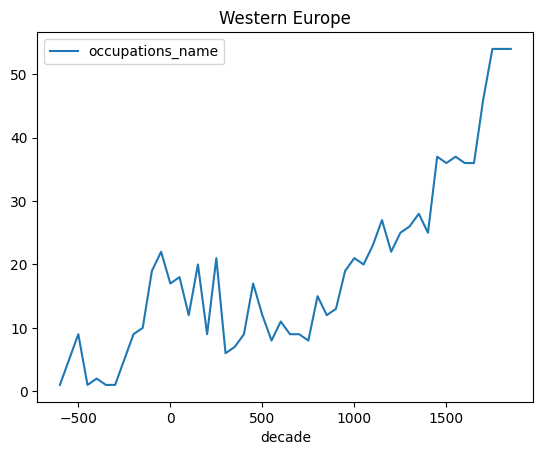

In [43]:
region_name =  'Western Europe'
min_date = -800
max_date = 1850

df_final = df_final_original[df_final_original['region_name']==region_name]
df_final = df_final[df_final['decade']>=min_date]
df_fig = df_final[df_final['decade']<=max_date]

df_final = df_final.groupby(['decade', 'region_name']).sample(100, random_state=42, replace = True)
df_fig = df_final.groupby(['region_name','decade'])['occupations_name'].apply(lambda x : len(set(x))).reset_index()
df_fig.plot(x = 'decade', y = 'occupations_name', title = region_name)

In [44]:


# Define a custom aggregation function
def custom_group(group, max_size=100):
    return group.sample(min(len(group), max_size))

# Group the DataFrame by 'group_column' and apply the custom aggregation function
#df_final = df_final.groupby(['decade', 'region_name'], group_keys=False).apply(custom_group)
df_final = df_final_original.groupby(['decade', 'region_name']).sample(100, random_state=41, replace = True)

region_name =  'Western Europe'

min_date = 1150
max_date = 1850

df_final = df_final[df_final['region_name']==region_name]


df_final = df_final[df_final['decade']>=min_date]
df_final = df_final[df_final['decade']<=max_date]
df_final


,individual_wikidata_id,decade,occupations_name,region_name
346149,Q372888,1150,theologian,Western Europe
62215,Q599071,1150,musician,Western Europe
104263,Q1234687,1150,historian,Western Europe
627973,Q315347,1150,theologian,Western Europe
220189,Q281966,1150,historian,Western Europe
...,...,...,...,...
661804,Q94925041,1850,translator,Western Europe
738084,Q23620623,1850,pipe and tabor player,Western Europe
684487,Q54638005,1850,historian,Western Europe
510688,Q88473517,1850,editor,Western Europe
